# Normal Equation

## Jorge Alberto Padilla Gutierrez

# Imports

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Algorithm

Text(0, 0.5, 'Y')

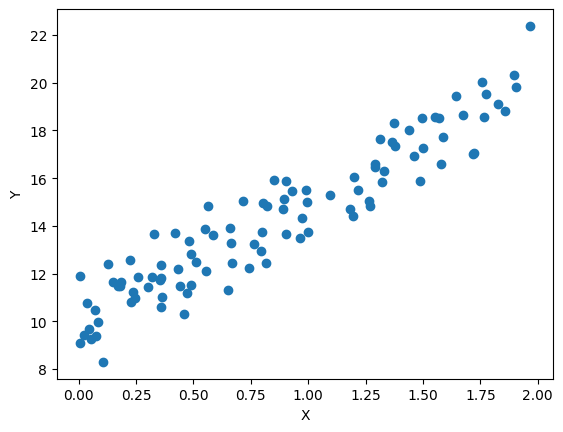

In [7]:
# Uniform Distribution
X = 2 * np.random.rand(100, 1)

# Normal Distribution
# y = bias + weight*X + error
Y = 10 + 5 * X + np.random.randn(100,1)

# Plot
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

# Normal Equation

$
f(x) -> y
$

$
\theta = (X^TX)^{-1}X^Ty
$

In [16]:
# Add x_0 = 1; to each instance -> 1
X_b = np.c_[np.ones((100,1)),X]

# Theta = inverse(X^T * X) * X^T * y
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

print(f"Bias: {theta[0]}\nWeight(s): {theta[1]}")

Bias: [9.97352116]
Weight(s): [5.03661984]


$
Bias = 9.97 \approx 10
$

$
Weight = 5.03 \approx 5
$

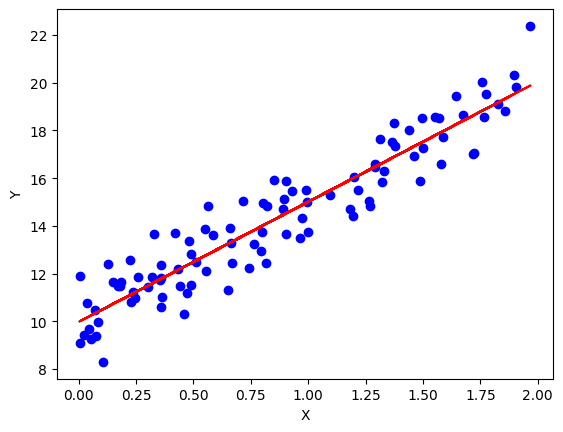

In [17]:
# Plot
plt.scatter(X,Y, c='b', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(X, X_b.dot(theta), c='r', label='Model')

In [20]:
X_test = np.array([
    [0],
    [2],
    [1.2]
])
X_test = np.c_[np.ones((3,1)),X_test]

y_preds = X_test.dot(theta)

# Scikit Learn Models

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [27]:
model_lr = LinearRegression()
model_lr.fit(X,Y)

print(f"LinearRegression\nBias: {model_lr.intercept_}\nWeight: {model_lr.coef_}")

model_sgd = SGDRegressor()
model_sgd.fit(X,Y.reshape(-1))

print(f"SGDRegressor\nBias: {model_sgd.intercept_}\nWeight: {model_sgd.coef_}")

LinearRegression
Bias: [9.97352116]
Weight: [[5.03661984]]
SGDRegressor
Bias: [9.60726814]
Weight: [5.39274788]


# Polynomial Regression

In [33]:
# Uniform Distribution
X = 6 * np.random.rand(100, 1) - 3

# Normal Distribution
# y = bias + weight*X + error
Y = 2 + 2 * X**2 + X + np.random.randn(100,1)

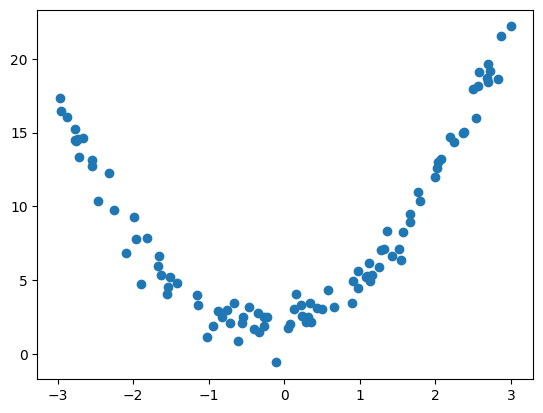

In [34]:
plt.scatter(X,Y)

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
pol = PolynomialFeatures(degree=2)
X_poly = pol.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)
print(f"Polynomial 2nd Degree\nBias: {model.intercept_}\nWeights: {model.coef_}")

Polynomial 2nd Degree
Bias: [2.04536722]
Weights: [[0.         0.95936963 1.98779031]]


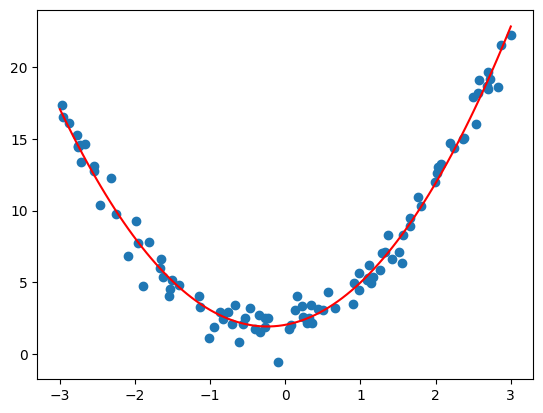

In [41]:
X_tmp = np.linspace(-3,3,100).reshape(100,1)
X_tmp_poly = pol.transform(X_tmp)

plt.scatter(X,Y)
plt.plot(X_tmp, model.predict(X_tmp_poly), c='r', label="Model")